# １章 ウェブの注文数を分析する１０本ノック

ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。  
データの属性を理解し、分析をするためにデータを加工した後、  
データの可視化を行うことで問題を発見していくプロセスを学びます。

## ノック１：データを読み込んでみよう

In [25]:
import pandas as pd
customer_master = pd.read_csv("customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [26]:
item_master = pd.read_csv("item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [27]:
transaction_1 = pd.read_csv("transaction_1.csv")
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [28]:
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


## ノック２：データを結合(ユニオン)してみよう

同じようなデータの種類なので単純にデータを足し算する。この際にデータは単純にデータ数が**行方向または縦**に増える。これを **データ結合（ユニオン）** という。


**pd.cancat([結合したいデータ],ignore_index=True)**

ignore_index=Trueでインデックスを無視

In [29]:
transaction_2 = pd.read_csv("transaction_2.csv")
transaction = pd.concat([transaction_1,transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [30]:
# 行方向に増えているかの確認
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [31]:
transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


In [32]:
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


## ノック３：売上データ同士を結合(ジョイン)してみよう

transaction_detailとtransactionのデータを見るとtransaction_idが共通している人は同一人物であることがわかるので、**横方向**に情報を足す

これを **データの結合（ジョイン）** といい、**pd.merge(追加先,追加したいデータ元[追加したい要素],on=ジョインキー(何が重複しているか),how=ジョインの種類)**

で実行可能

詳しくは公式リファレンスをチェック

In [33]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id","payment_date","customer_id"]], on="transaction_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


## ノック４：マスタデータを結合(ジョイン)してみよう

In [34]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


## ノック5：必要なデータ列を作ろう

In [51]:
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity","item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


データを特定の要素だけ確認したい時に２行目にあるように


**data[["",""]].head()** とすることで確認することができる

## ノック6：データ検算をしよう

In [36]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [37]:
join_data["price"].sum() == transaction["price"].sum()

True

## ノック7：各種統計量を把握しよう

### 欠損値の確認

In [38]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

### 各種統計量の算出

In [39]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


### いつからいつまでのデータか

In [40]:
join_data["payment_date"].min()
join_data["payment_date"].max()

'2019-07-31 23:41:38'

## ノック8：月別でデータを集計してみよう

### データ要素のデータ型をチェック
object型だと文字列としてのみの扱いになってしまうのでtypeを変更する必要がある

In [41]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [42]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%M")
join_data[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201936
1,2019-02-01 01:37:23,201937
2,2019-02-01 02:34:19,201934
3,2019-02-01 02:47:23,201947
4,2019-02-01 04:33:46,201933


In [43]:
join_data[["payment_date","payment_month"]].dtypes

payment_date     datetime64[ns]
payment_month            object
dtype: object

In [44]:
join_data.groupby("payment_month").sum()["price"]

payment_month
201900    13635000
201901    16060000
201902    16185000
201903    16040000
201904    16315000
201905    15130000
201906    16260000
201907    15335000
201908    16520000
201909    15695000
201910    15615000
201911    17570000
201912    13225000
201913    18485000
201914    12800000
201915    15835000
201916    15670000
201917    17745000
201918    15720000
201919    20425000
201920    17425000
201921    13705000
201922    18010000
201923    16190000
201924    14365000
201925    16975000
201926    15605000
201927    15605000
201928    14770000
201929    17800000
201930    18070000
201931    16605000
201932    12915000
201933    18185000
201934    16605000
201935    14835000
201936    17145000
201937    15190000
201938    18310000
201939    16755000
201940    16445000
201941    16525000
201942    15015000
201943    15240000
201944    16260000
201945    16280000
201946    16850000
201947    15705000
201948    16960000
201949    16575000
201950    17060000
201951    1690500

## ノック9：月別、商品別でデータを集計してみよう

月別 : **payment_month**


商品別 : **item_name**


これらを**price,quantity**　　売上、数量を出力

In [46]:
join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]

price  quantity
payment_month item_name                   
201900        PC-A       2450000        49
              PC-B       2125000        25
              PC-C       1920000        16
              PC-D       2520000        14
              PC-E       4620000        22
...                          ...       ...
201959        PC-A       2750000        55
              PC-B       2295000        27
              PC-C       2160000        18
              PC-D       3060000        17
              PC-E       7770000        37

[300 rows x 2 columns]

### ピボットテーブルの作成

In [50]:
pd.pivot_table(join_data, index="item_name", columns="payment_month", values=["price","quantity"],aggfunc="sum")

price                                                        \
payment_month   201900   201901   201902   201903   201904   201905   201906   
item_name                                                                      
PC-A           2450000  2700000  2400000  3000000  2500000  1950000  2400000   
PC-B           2125000  2890000  2295000  2210000  2295000  2890000  2040000   
PC-C           1920000  2280000  2400000  3120000  2640000  1440000  1080000   
PC-D           2520000  2520000  3420000  2880000  2160000  2340000  3600000   
PC-E           4620000  5670000  5670000  4830000  6720000  6510000  7140000   

                                          ... quantity                       \
payment_month   201907   201908   201909  ...   201950 201951 201952 201953   
item_name                                 ...                                 
PC-A           3000000  2900000  2500000  ...       35     58     51     56   
PC-B           1445000  2040000  2125000  ...       40     37     33     23   
PC-C           2160000  2160000  2640000  ...       19     19     21     22   
PC-D           1800000  1440000  2340000  ...       15     15     21     11   
PC-E           6930000  7980000  6090000  ...       33     28     27     28   

                                                         
payment_month 201954 201955 201956 201957 201958 201959  
item_name                                                
PC-A              41     60     58     49     38     55  
PC-B              33     25     33     17     32     27  
PC-C              20     10     17     20      9     18  
PC-D              11     17     15     14     11     17  
PC-E              34     32     30     34     31     37  

[5 rows x 120 columns]

## ノック10：商品別の売上推移を可視化してみよう

In [52]:
graph_data = pd.pivot_table(join_data, index="payment_month",columns="item_name",values="price",aggfunc="sum")
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201900,2450000,2125000,1920000,2520000,4620000
201901,2700000,2890000,2280000,2520000,5670000
201902,2400000,2295000,2400000,3420000,5670000
201903,3000000,2210000,3120000,2880000,4830000
201904,2500000,2295000,2640000,2160000,6720000


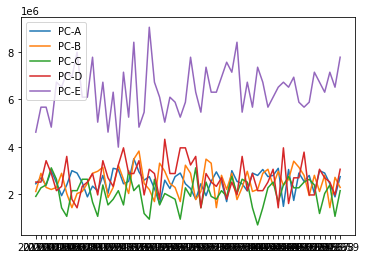

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label="PC-A")
plt.plot(list(graph_data.index), graph_data["PC-B"], label="PC-B")
plt.plot(list(graph_data.index), graph_data["PC-C"], label="PC-C")
plt.plot(list(graph_data.index), graph_data["PC-D"], label="PC-D")
plt.plot(list(graph_data.index), graph_data["PC-E"], label="PC-E")

plt.legend()

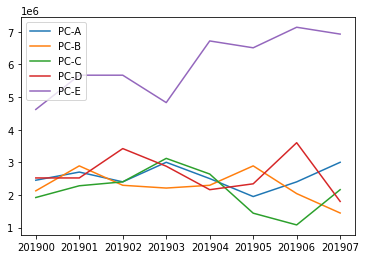

In [69]:
plt.plot(list(graph_data.index[:8]), graph_data["PC-A"][:8], label="PC-A")
plt.plot(list(graph_data.index[:8]), graph_data["PC-B"][:8], label="PC-B")
plt.plot(list(graph_data.index[:8]), graph_data["PC-C"][:8], label="PC-C")
plt.plot(list(graph_data.index[:8]), graph_data["PC-D"][:8], label="PC-D")
plt.plot(list(graph_data.index[:8]), graph_data["PC-E"][:8], label="PC-E")

plt.legend()